In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import stats
from collections import Counter
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNearestneighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

# set plotting pallette
sns.set_palette('Purples_r')

In [2]:
# load the data
loan = pd.read_csv(r'C:\Users\DELL\Desktop\data\ML data\fffff\loan_data.csv')
pd.options.display.max_columns = None

# Data Inspection

In [3]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
print(f'Loan Data contains {loan.shape[0]} rows and {loan.shape[1]} columns')

Loan Data contains 9578 rows and 14 columns


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [6]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


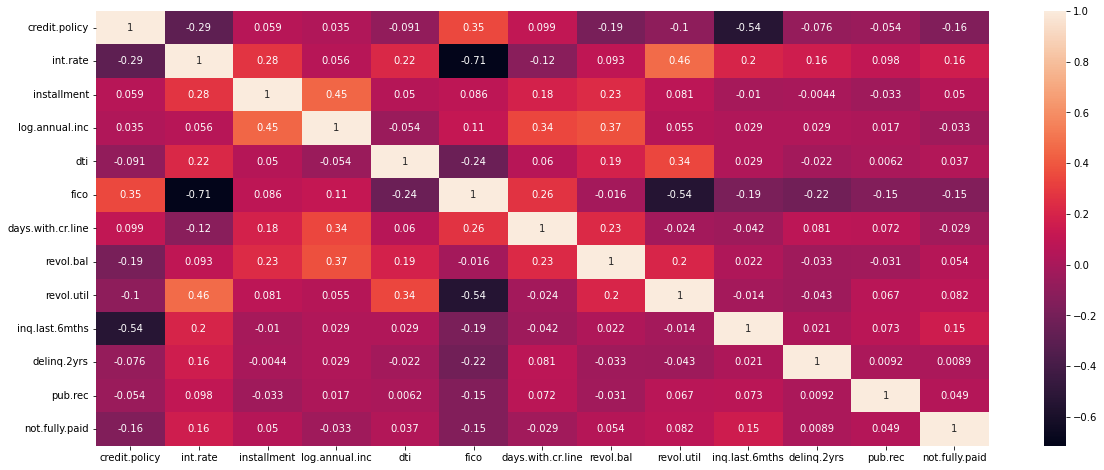

In [7]:
plt.figure(figsize=(20,8))
sns.heatmap(loan.corr(), annot = True)
plt.show()

In [8]:
dummies = pd.get_dummies(loan['purpose'], drop_first = True)
dummies.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [9]:
X = loan.drop(['purpose','not.fully.paid'], axis='columns')
X = pd.concat([X,dummies], axis='columns').values
y = loan['not.fully.paid'].values

# Instatiate the Scaler
scaler = StandardScaler()

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 2, test_size = 0.25, stratify = y)
# Scale the data
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

Given our goal of minimizing false positives—incorrectly predicting borrowers who fully paid their loans as non-payers— we will prioritize precision as our evaluation metric.

In [11]:
# Build Base Model
lr = LogisticRegression()
lr.fit(X_scaled_train, y_train)
y_pred = lr.predict(X_scaled_test)
score = lr.score(X_test,y_test)
p_score = precision_score(y_test,y_pred)
r_score = recall_score(y_test,y_pred)
print(f"The  R-squared value using Logistic Regression is {score}")
print(f"The Precision score is {p_score}")
print(f"The Recall score is {r_score}")

The  R-squared value using Logistic Regression is 0.2797494780793319
The Precision score is 0.4782608695652174
The Recall score is 0.028720626631853787


In [12]:
# Build Comparison Model
dt = DecisionTreeClassifier()
dt.fit(X_scaled_train, y_train)
y_pred = dt.predict(X_scaled_test)
score = dt.score(X_scaled_test, y_test)
r_score = recall_score(y_test,y_pred)
p_score = precision_score(y_test, y_pred)
print(f"The  R-squared value using Decision Tree is {score}")
print(f"The Precision score is {p_score}")
print(f"The Recall score is {r_score}")

The  R-squared value using Decision Tree is 0.7453027139874739
The Precision score is 0.22650602409638554
The Recall score is 0.2454308093994778


In [13]:
# Build another Comparison Model
rf = RandomForestClassifier()
rf.fit(X_scaled_train, y_train)
score = rf.score(X_scaled_test, y_test)
y_pred = rf.predict(X_scaled_test)
p_score = precision_score(y_test, y_pred)
r_score = recall_score(y_test,y_pred)
print(f"The  R-squared value using Random Forest is {score}")
print(f"The Precision score is {p_score}")
print(f"The Recall score is {r_score}")

The  R-squared value using Random Forest is 0.8400835073068893
The Precision score is 0.5
The Recall score is 0.02349869451697128


In [14]:
# from sklearn.ensemble import VotingClassifier

With a better accuracy score and a better precision  score, The random forest model performed better, we will tuning it to get a better result

In [15]:
# Tuning the Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2']  # Maximum features to consider for splitting
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

grid_search.fit(X_scaled_train, y_train)
# view the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
best_model.fit(X_scaled_train, y_train)
y_pred = best_model.predict(X_scaled_test)
print(f'The precision score for the best model is {precision_score(y_test,y_pred)}')

The precision score for the best model is 0.6


In [20]:
import pickle
# save the model
filename = 'best_model.sav'
with open(filename, 'wb') as f:
    pickle.dump(best_model, f, protocol=4)

print(f"Model saved as '{filename}'")

Model saved as 'best_model.sav'
